# Neural Network Classification with TensorFlow

In [286]:
import tensorflow as tf
print(f"Tensorflow version: {tf.__version__}")
import pandas as pd

Tensorflow version: 2.5.0


# Circles Dataset
## Create data to view and fit

In [287]:
from sklearn.datasets import make_circles
n_samples = 1000
X, y= make_circles(n_samples, noise=0.03, random_state=42)

X[:5], y[:5]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343]]), array([1, 1, 1, 1, 0]))

In [288]:
# visualise the data
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "label": y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


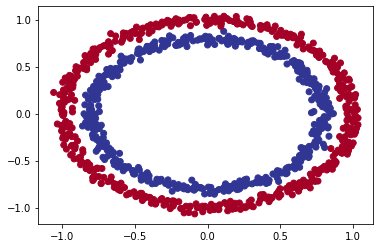

In [289]:
import matplotlib.pyplot as plt
plt.scatter(circles["X0"], circles["X1"], c=y, cmap=plt.cm.RdYlBu)

## Building a very bad model

In [290]:
X.shape, y.shape

((1000, 2), (1000,))

In [291]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
],name="circles_model")

model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_1.fit(X, y, epochs=100, verbose=0)
model_1.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6932450532913208, 0.5]

 Model is basically just guessing at this point, as ~50% acc on binary classification

In [292]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
],name="circles_model2")

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['accuracy'])

model_2.fit(X, y, epochs=200, verbose=0)
model_2.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6936 - accuracy: 0.5000


[0.6935999393463135, 0.5]

## Improving our model

In [293]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
], name="circles_model3")

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3.fit(X, y, epochs=100, verbose=0)

model_3.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6980 - accuracy: 0.5080


[0.6980254650115967, 0.5080000162124634]

In [294]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X
  """
  x_min, x_max = X[:,0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:,1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), 
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
  y_pred = model.predict(x_in)

  # check for multi-class
  if len(y_pred[0]) > 1:
    print("Multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("Binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Binary classification


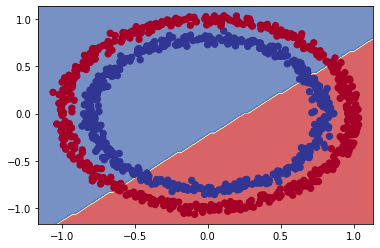

In [295]:
plot_decision_boundary(model_3, X, y)

In [296]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
], name="circles_model3")

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_4.fit(X, y, epochs=50, verbose=0)

model_4.evaluate(X,y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0208 - accuracy: 1.0000


[0.02076437510550022, 1.0]

Binary classification


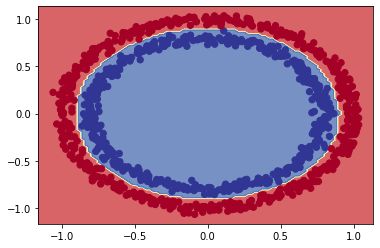

In [297]:
plot_decision_boundary(model_4, X, y)

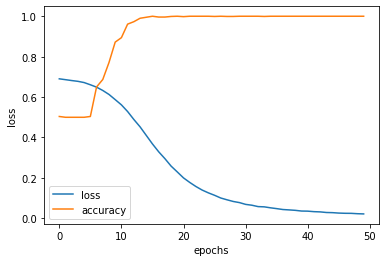

In [298]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")
plt.show()


In [299]:
# create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

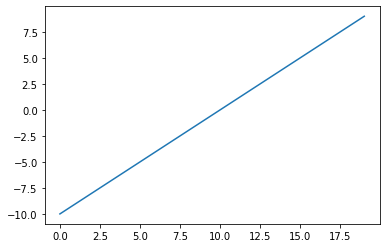

In [300]:
plt.plot(A);

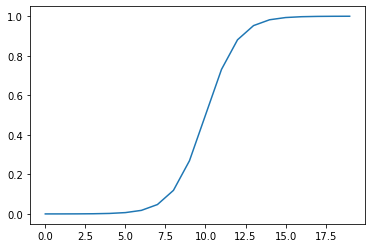

In [301]:
B = tf.keras.activations.sigmoid(A)
plt.plot(B)

## Evaluating & improving our classification model

In [302]:
# split into train and test tests
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [303]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid"),
],name="model5")

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

history = model_5.fit(X_train, y_train, epochs=25)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6847 - accuracy: 0.5425
Epoch 2/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6777 - accuracy: 0.5525
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5512
Epoch 4/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6681 - accuracy: 0.5775
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - accuracy: 0.5850
Epoch 6/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6546 - accuracy: 0.5838
Epoch 7/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6413 - accuracy: 0.6750
Epoch 8/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6264 - accuracy: 0.7013
Epoch 9/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6038 - accuracy: 0.7487
Epoch 10/25
25/25 [==============================] - 0s 1ms/step - loss: 0.5714 - accuracy: 0.7738
Epoch 11/25
25/25 [

In [304]:
model_5.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 1.0000


[0.1246885135769844, 1.0]

Binary classification
Binary classification


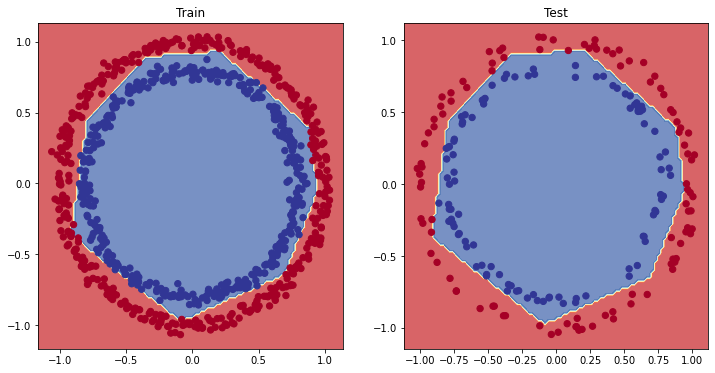

In [305]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5, X_test, y_test)
plt.show()

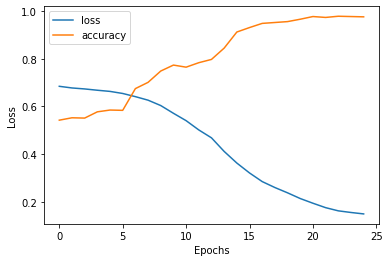

In [306]:
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.show()

## Finding the ideal learning rate

In [307]:
tf.random.set_seed(42)

model_6 = tf.keras.Sequential(
  [tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(4, activation="relu"),
   tf.keras.layers.Dense(1, activation="sigmoid")]
)

model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_6 = model_6.fit(X_train, y_train, callbacks=[lr_scheduler], epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6945 - accuracy: 0.4988
Epoch 2/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6938 - accuracy: 0.4975
Epoch 3/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6930 - accuracy: 0.4963
Epoch 4/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6922 - accuracy: 0.4975
Epoch 5/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6914 - accuracy: 0.5063
Epoch 6/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6906 - accuracy: 0.5013
Epoch 7/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6898 - accuracy: 0.4950
Epoch 8/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.5038
Epoch 9/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6880 - accuracy: 0.5013
Epoch 10/100
25/25 [==============================] - 0s 1ms/step - loss: 0.6871 - accuracy: 0.5050
Epoch 11/

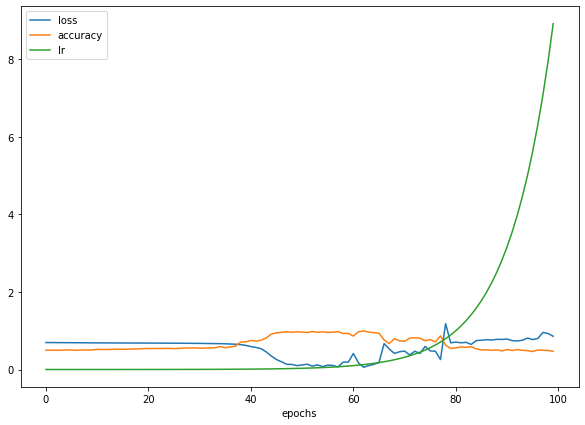

In [308]:
pd.DataFrame(history_6.history).plot(figsize=(10,7), xlabel="epochs")

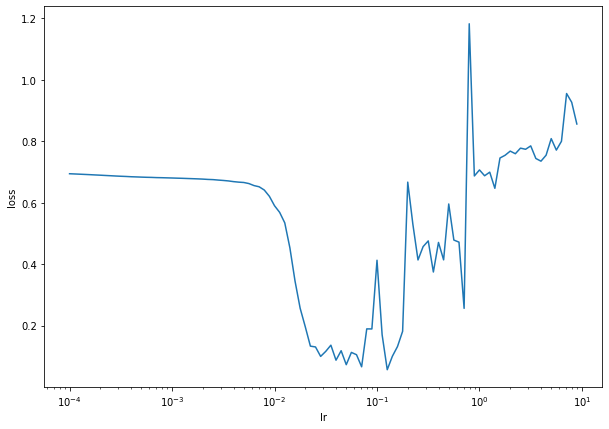

In [309]:
lrs = 1e-4 * (10**(tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_6.history["loss"])
plt.xlabel("lr")
plt.ylabel("loss")
plt.show()

In [310]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.02),
                metrics=["accuracy"])

history_7 = model_7.fit(X_train, y_train, epochs=20)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6837 - accuracy: 0.5600
Epoch 2/20
25/25 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.5750
Epoch 3/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6626 - accuracy: 0.5875
Epoch 4/20
25/25 [==============================] - 0s 1ms/step - loss: 0.6332 - accuracy: 0.6388
Epoch 5/20
25/25 [==============================] - 0s 1ms/step - loss: 0.5830 - accuracy: 0.7563
Epoch 6/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4907 - accuracy: 0.8313
Epoch 7/20
25/25 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.8450
Epoch 8/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3596 - accuracy: 0.8875
Epoch 9/20
25/25 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.9100
Epoch 10/20
25/25 [==============================] - 0s 1ms/step - loss: 0.2512 - accuracy: 0.9500
Epoch 11/20
25/25 [

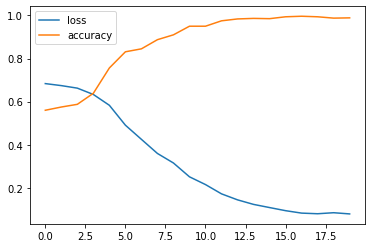

In [311]:
pd.DataFrame(history_7.history).plot()

In [312]:
model_7.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900


[0.05740184709429741, 0.9900000095367432]

Binary classification
Binary classification


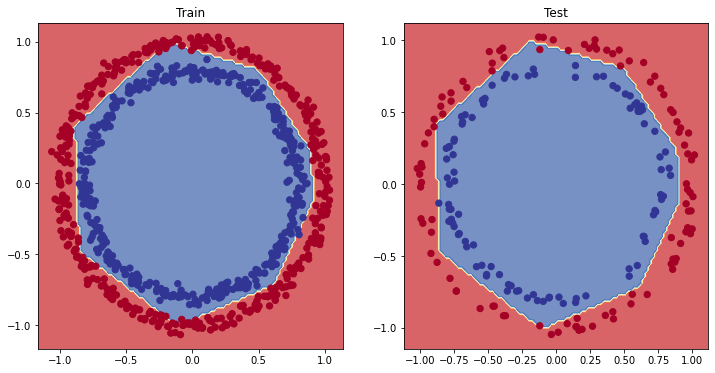

In [313]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_7, X_train, y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_7, X_test, y_test)
plt.show()

## Clasification evaluation methods

In [314]:
loss, acc = model_7.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(acc*100):.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9900
Model loss on the test set: 0.05740184709429741
Model accuracy on the test set: 99.00%


In [315]:
y_test[:5], y_preds[:5]
# predictions array are in prediction probability form

(array([1, 1, 1, 1, 0]), array([9, 2, 1, 1, 6]))

In [316]:
# convert to binary binary format
tf.round(y_preds)[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([9, 2, 1, 1, 6])>

In [317]:
from sklearn.metrics import confusion_matrix

y_preds = model_7.predict(X_test)
confusion_matrix(y_test, tf.round(y_preds))

array([[99,  2],
       [ 0, 99]])

In [318]:
import itertools

def plot_confusion_matrix(y_test, y_preds, classes=False, figsize=(10,10),textsize=20):
  """
  Pretified confusion matrix using sklearn's confusion_matrix() func.
  """

  cm = confusion_matrix(y_test, tf.round(y_preds))
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] #normalize our confusion matrix
  nm_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(nm_classes),
         yticks=np.arange(nm_classes),
         xticklabels=labels,
         yticklabels=labels)
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  ax.yaxis.label.set_size(textsize)
  ax.xaxis.label.set_size(textsize)
  ax.title.set_size(textsize)
  
  threshold = (cm.max() + cm.min()) / 2

  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)", 
             horizontalalignment="center",
             color="white" if cm[i,j] > threshold else "black",
             size=textsize)
  
  return

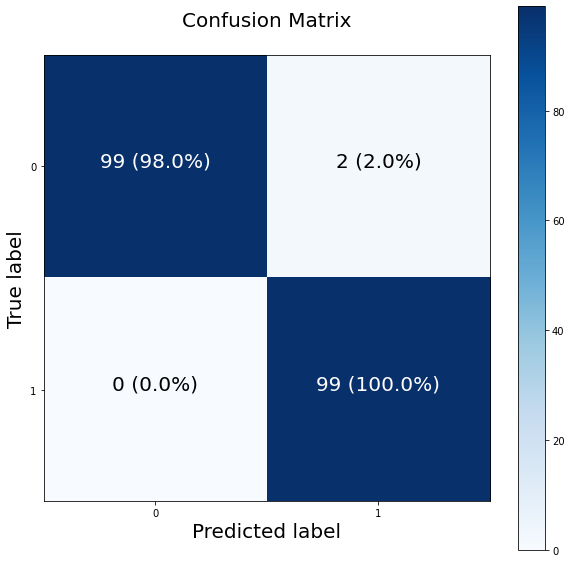

In [319]:
plot_confusion_matrix(y_test, y_preds, classes=False)

# Multi-class Classification

In [320]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [321]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [322]:
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label:\n{train_labels[0]}\n")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [323]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

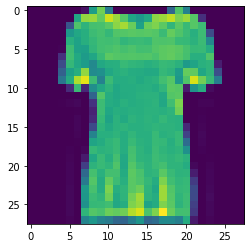

In [324]:
import matplotlib.pyplot as plt

plt.imshow(train_data[10])

In [325]:
# create a small list so we can index onto training labels to be human readable
class_names = ["T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle Boot"]

In [326]:
train_labels[10], class_names[train_labels[10]]

(0, 'T-shirt/top')

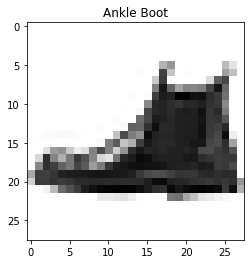

In [327]:
indx = 450
plt.imshow(train_data[indx], cmap=plt.cm.binary)
plt.title(class_names[train_labels[indx]]);

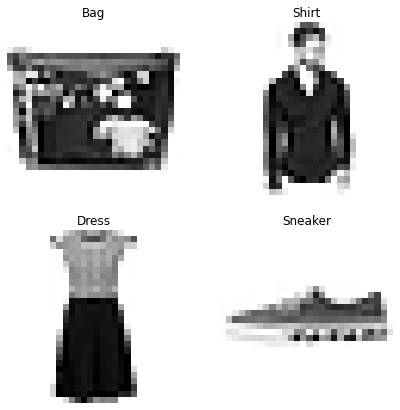

In [328]:
import random

plt.figure(figsize=(7,7))
for i in range(4):
  ax = plt.subplot(2, 2, i+1)
  rand_indx = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_indx], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_indx]])
  plt.axis(False)
plt.show()

## Building a multiclass classification model

In [329]:
tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 # CategoricalCrossentropy() expects labels to be one-hot encoded
                 # , hence use Spare to allow for int inputs
                 optimizer="adam",
                 metrics=["accuracy"])

non_norm_history = model_11.fit(train_data, train_labels, epochs=10,
                                validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [330]:
model_11.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_8 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_111 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_112 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_113 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [331]:
# Normalise our data between 0 & 1
train_data_norm = train_data / 255
test_data_norm = test_data / 255

In [332]:
norm_history = model_11.fit(train_data_norm, train_labels, epochs=10,
                            validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.0508 - accuracy: 0.2404 - val_loss: 1.5526 - val_accuracy: 0.3549
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2229 - accuracy: 0.5242 - val_loss: 1.0025 - val_accuracy: 0.6162
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.9192 - accuracy: 0.6410 - val_loss: 0.8889 - val_accuracy: 0.6475
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8526 - accuracy: 0.6604 - val_loss: 0.8564 - val_accuracy: 0.6613
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.8221 - accuracy: 0.6723 - val_loss: 0.8257 - val_accuracy: 0.6800
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7812 - accuracy: 0.7039 - val_loss: 0.7921 - val_accuracy: 0.7140
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7457 - accuracy: 0.7308 - val_loss: 0.7708 - val_accuracy:

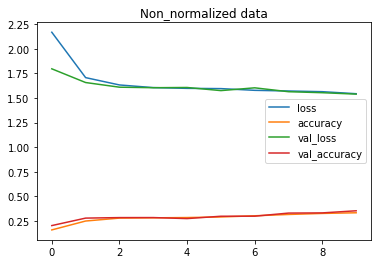

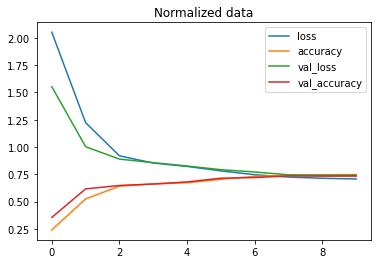

In [333]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non_normalized data")
pd.DataFrame(norm_history.history).plot(title="Normalized data")
plt.show()

## Find the ideal learning rate

In [334]:
tf.random.set_seed(42)

model_13_layers =[tf.keras.layers.Flatten(input_shape=(28, 28)),
                  tf.keras.layers.Dense(4, activation="relu"),
                  tf.keras.layers.Dense(4, activation="relu"),
                  tf.keras.layers.Dense(10, activation="softmax")]

model_13 = tf.keras.Sequential(layers=model_13_layers)

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer="adam",
                 metrics=["accuracy"])

# create a lr callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm, train_labels, epochs=40,
                               validation_data=(test_data_norm, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6366 - accuracy: 0.7759 - val_loss: 0.6400 - val_accuracy: 0.7808
Epoch 3/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5934 - accuracy: 0.7911 - val_loss: 0.6278 - val_accuracy: 0.7770
Epoch 4/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5749 - accuracy: 0.7969 - val_loss: 0.6122 - val_accuracy: 0.7871
Epoch 5/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5655 - accuracy: 0.7987 - val_loss: 0.6061 - val_accuracy: 0.7913
Epoch 6/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5569 - accuracy: 0.8022 - val_loss: 0.5917 - val_accuracy: 0.7940
Epoch 7/40
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5542 - accuracy: 0.8036 - val_loss: 0.5898 - val_accuracy:

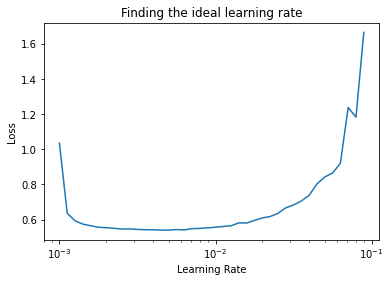

In [335]:
# plot lr decay curve
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

In [336]:
# refit a model with the ideal learning rate
tf.random.set_seed(42)

model_14 = tf.keras.Sequential([
     tf.keras.layers.Flatten(input_shape=(28, 28)),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(4, activation="relu"),
     tf.keras.layers.Dense(10, activation="softmax")
     ])

model_14.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

history_14 = model_14.fit(train_data_norm, train_labels, epochs=20,validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy:

## Evaluating our multiclass classification model

In [337]:
y_probs = model_14.predict(test_data_norm)
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([8.5629975e-11, 3.5361563e-13, 2.6633756e-05, 4.6356202e-08,
        5.0949860e-05, 9.6119247e-02, 8.1778040e-08, 9.1868855e-02,
        4.0605278e-03, 8.0787367e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle Boot')

In [338]:
y_preds = y_probs.argmax(axis=1)

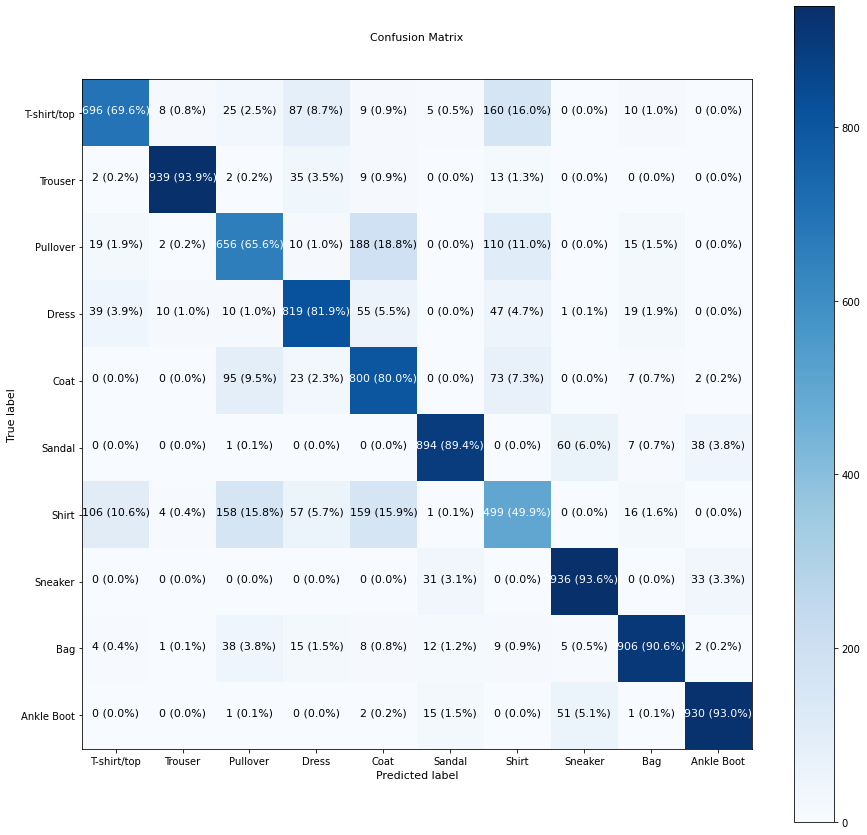

In [339]:
plot_confusion_matrix(test_labels, y_preds, classes=class_names,
                      figsize=(15,15), textsize=11)

## Visualising our models predictions for a random sample

In [340]:
import random

def plot_random_images(model, images, true_labels, classes, num_images):
  """
  Picks rand images, plots it and labels it with a prediction and truth label
  """
  plt.figure(figsize=(num_images*3,5))
  for j in range(num_images):
    plt.subplot(1, num_images, j+1)
    i = random.randint(0, len(images))

    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    plt.imshow(target_image, cmap=plt.cm.binary)

    # change the color of the titles depending on if predictions is correct
    if pred_label == true_label:
      color="green"
    else:
      color="red"
    
    plt.title("Pred: {} {:2.0f}%\nTrue: {}".format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label), color=color)
    plt.tick_params(
        axis="both",
        which='both',
        bottom=False,
        top=False,
        labelbottom=False,
        left=False,
        labelleft=False)
    plt.tight_layout()
    
  plt.show()

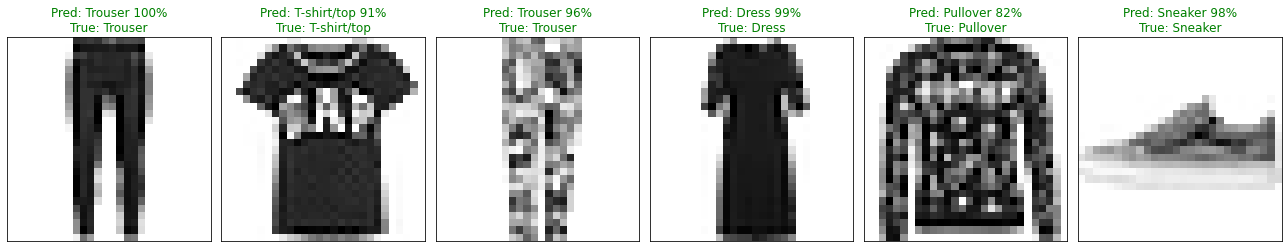

In [341]:
plot_random_images(model=model_14,
                   images=test_data_norm, 
                  true_labels=test_labels,
                  classes=class_names,
                  num_images=6)

## What patterns is our model learning?

In [342]:
model_14.summary()

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 4)                 3140      
_________________________________________________________________
dense_118 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_119 (Dense)            (None, 10)                50        
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [343]:
model_14.layers

In [344]:
model_14.layers[1]

In [345]:
weights, biases = model_14.layers[1].get_weights()

weights, weights.shape

(array([[ 0.7150263 , -0.06077093, -0.99763095, -1.0484313 ],
        [ 0.2773212 , -0.471554  , -0.52916455,  0.02329255],
        [ 0.7752433 ,  0.5402759 , -1.128857  , -0.7426156 ],
        ...,
        [-0.3945342 ,  0.47628632, -0.2264153 ,  0.2550593 ],
        [-0.40515798,  0.61810046,  0.23928414, -0.50387603],
        [ 0.23884593,  0.11606961, -0.12131374,  0.04352392]],
       dtype=float32), (784, 4))

In [346]:
biases, biases.shape

(array([ 2.4485964e-02, -6.1471871e-04, -2.7230152e-01,  8.1124878e-01],
       dtype=float32), (4,))

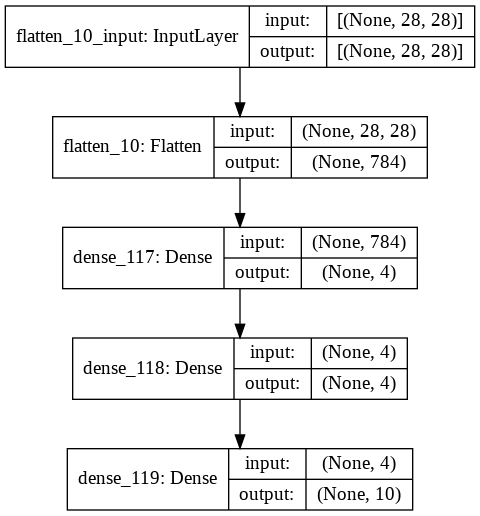

In [347]:
from tensorflow.keras.utils import plot_model
plot_model(model_14, show_shapes=True)

# Fashion MNIST Final Model

In [416]:
layers = [tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(128, activation="relu"),
          tf.keras.layers.Dense(64, activation="relu"),
          tf.keras.layers.Dropout(.25),
          tf.keras.layers.Dense(10, activation="softmax")]

final_model = tf.keras.Sequential(layers=layers, name="finalModel")

final_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 metrics=["accuracy"])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.01,
                                            patience=7)

history_final = final_model.fit(train_data_norm, train_labels, 
                validation_data=(test_data_norm, test_labels), epochs=50, 
                callbacks=[callback],
                verbose=2)

Epoch 1/50
1875/1875 - 5s - loss: 0.5440 - accuracy: 0.8067 - val_loss: 0.4170 - val_accuracy: 0.8489
Epoch 2/50
1875/1875 - 4s - loss: 0.3949 - accuracy: 0.8559 - val_loss: 0.4470 - val_accuracy: 0.8404
Epoch 3/50
1875/1875 - 4s - loss: 0.3582 - accuracy: 0.8692 - val_loss: 0.3623 - val_accuracy: 0.8679
Epoch 4/50
1875/1875 - 4s - loss: 0.3338 - accuracy: 0.8772 - val_loss: 0.3787 - val_accuracy: 0.8639
Epoch 5/50
1875/1875 - 4s - loss: 0.3177 - accuracy: 0.8828 - val_loss: 0.3504 - val_accuracy: 0.8725
Epoch 6/50
1875/1875 - 4s - loss: 0.3002 - accuracy: 0.8877 - val_loss: 0.3669 - val_accuracy: 0.8683
Epoch 7/50
1875/1875 - 4s - loss: 0.2915 - accuracy: 0.8906 - val_loss: 0.3526 - val_accuracy: 0.8769
Epoch 8/50
1875/1875 - 4s - loss: 0.2816 - accuracy: 0.8955 - val_loss: 0.3440 - val_accuracy: 0.8788
Epoch 9/50
1875/1875 - 4s - loss: 0.2689 - accuracy: 0.9003 - val_loss: 0.3439 - val_accuracy: 0.8831
Epoch 10/50
1875/1875 - 4s - loss: 0.2622 - accuracy: 0.9013 - val_loss: 0.3300 - 

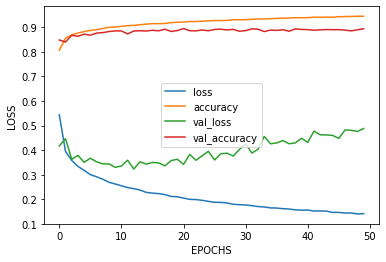

In [417]:
pd.DataFrame(history_final.history).plot()
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.show()

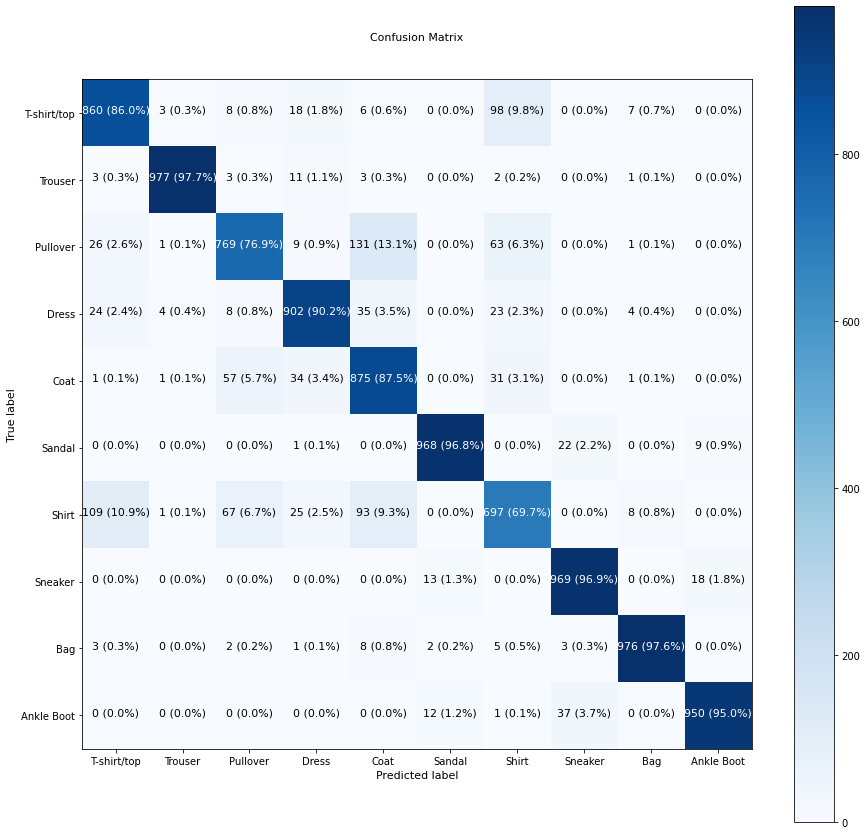

In [418]:
y_probs = final_model.predict(test_data_norm)
y_pred = y_probs.argmax(axis=1)
plot_confusion_matrix(test_labels, y_pred, classes=class_names,
                      figsize=(15,15), textsize=11)

In [419]:
val_acc = final_model.evaluate(test_data_norm, test_labels)[1]
print(f"FINAL MODEL'S TEST ACCURACY: {100*val_acc:.1f}%")

313/313 [==============================] - 0s 1ms/step - loss: 0.4880 - accuracy: 0.8943
FINAL MODEL'S TEST ACCURACY: 89.4%


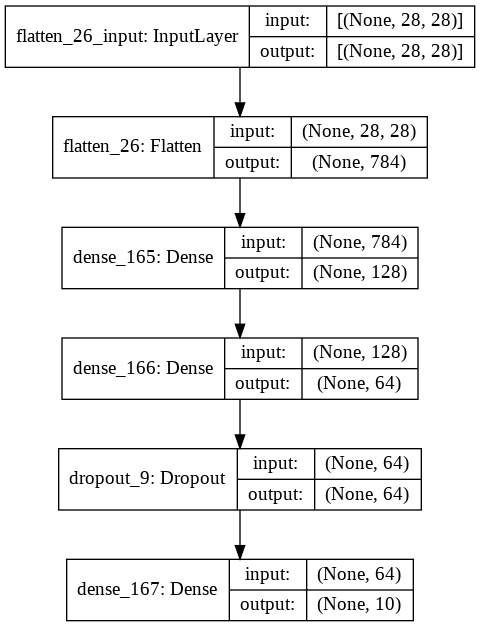

In [420]:
plot_model(final_model, show_shapes=True)

In [421]:
final_model.summary()

Model: "finalModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_165 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_166 (Dense)            (None, 64)                8256      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_167 (Dense)            (None, 10)                650       
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________
